In [8]:
%plot inline -w 600 -h 600 -r 150

# 7 Non-linear Optimization - Gradient descent 

## Nonlinear optimization

Let's say you are at the top of a mountain and you want to get down to the sea. How do you do this?

### Algorithm

1. Choose a ...

2. Go ....

   2a. In which direction? 

   How about the direction that promises do get you ...? This of course is the ....

   2b. How far do you walk?

   Well that's a tricky question - if you make a huge, 1000km step in the direction of the gradient, then you may miss the sea. In contrast, if your step size is 1mm, then you will never arrive - the step size is a very important parameter of this algorithm
   
3. Stop if you've reached your minimum (the sea), i.e., if the gradient is zero.

### Algorithm implemented

In [9]:
%%file gradientDescent.m

function [minimum,xes] = gradientDescent(x0,f,stepSize,maxIter)
% check input arguments
switch nargin
    case 2
        stepSize = 0.01;
        maxIter = 1000;
    case 3
        maxIter=1000;
    case 1
        error('call as gradientDescent(x0,g,stepSize,maxIter)')
end

% iteration number
iter = 1;

% init minimum candidate
minimum = x0;

% numeric delta size
delta = 0.00001;

% check whether we want to deliver history
if nargout==2
    xes = zeros(maxIter,1);
end

% as long as it's good
while iter<=maxIter
    % update history
    if nargout==2
        xes(iter)=minimum;
    end
    
    % do one update step of gradient descent
    minimum = minimum - (stepSize*((f(minimum+delta) - f(minimum))./delta));
    iter = iter + 1;
end



Created file '/Users/sucky/Desktop/MATLAB_for_Engineering_Math_Projects/ENG_MATH/5:14/gradientDescent.m'.


### Algorithm tested

Let's test our algorithm with a simple function $f(x)=\cos(x)*e^{2.5x}$ and a starting point of $x=0$:

found minimum @x=-3.177950
found minimum @x=-1.570801


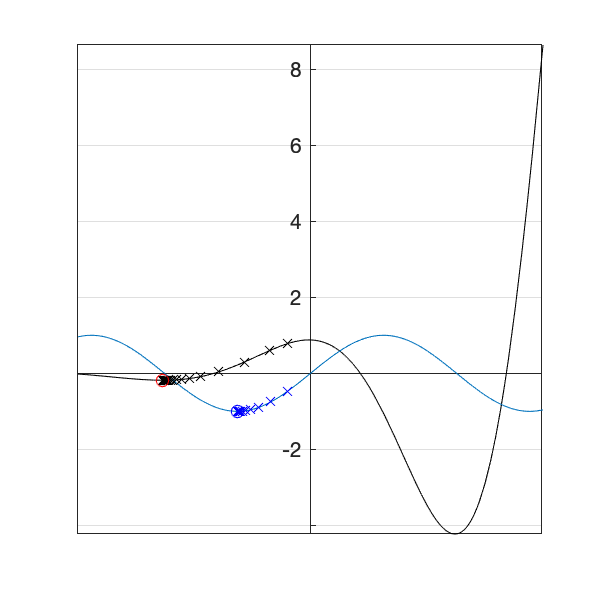

In [10]:
% define function to minimize
f = @(x) cos(x+0.5).*exp(0.5*x);
% its gradient
g = @(x) sin(x);

% starting point
x0 = -0.5; % might lead to different local minima.
% plot both f and g
fplot(f, 'k'); hold on
fplot(g)
% do the gradient descent and get history as well
[minimum,xes] = gradientDescent(x0,f,1,800);
fprintf('found minimum @x=%f\n',minimum);
% plot history and found minimum into plot
plot(xes,f(xes),'kx')
plot(minimum,f(minimum),'ro')
hold on

grid on;
ax = gca;
ax.XAxisLocation = 'origin';
ax.YAxisLocation = 'origin';


% do the gradient descent and get history as well
[minimum,xes] = gradientDescent(x0,g,0.4,800);
fprintf('found minimum @x=%f\n',minimum);
% plot history and found minimum into plot
plot(xes,g(xes),'bx')
plot(minimum,g(minimum),'bo')


How about making the step size larger?

found minimum @x=14.137162


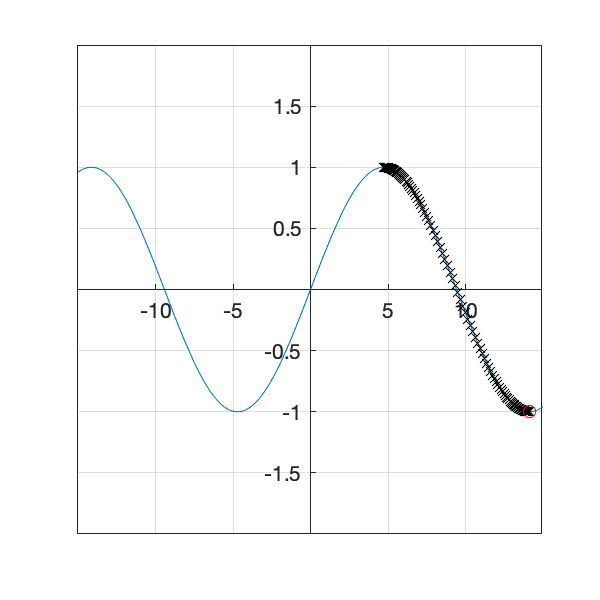

In [11]:
% define function to minimize
%f = @(x) cos(x+0.5).*exp(0.5*x);
% its gradient
g = @(x) sin(x/3);

% starting point
x0 = 3/2*pi;
% plot both f and g
%fplot(f); hold on
fplot(g)
hold on
% do the gradient descent and get history as well
[minimum,xes] = gradientDescent(x0,g,0.5,800);
fprintf('found minimum @x=%f\n',minimum);
% plot history and found minimum into plot
plot(xes,g(xes),'kx')
hold on
plot(minimum,g(minimum),'ro')

grid on;
ax = gca;
ax.XAxisLocation = 'origin';
ax.YAxisLocation = 'origin';
xlim([-15 15])
ylim([-2 2])

Whoops. That is a minimum, but that's one on the other side. This illustrates what happens if you go too far into the direction of the gradient - here the gradient first went down, then up and then to the other side of the function!

This is a big problem with gradient descent!

<div class="alert alert-warning">
<p>Gradient descent needs a ...
</div>

How about a different starting point?

found minimum @x=3.105235


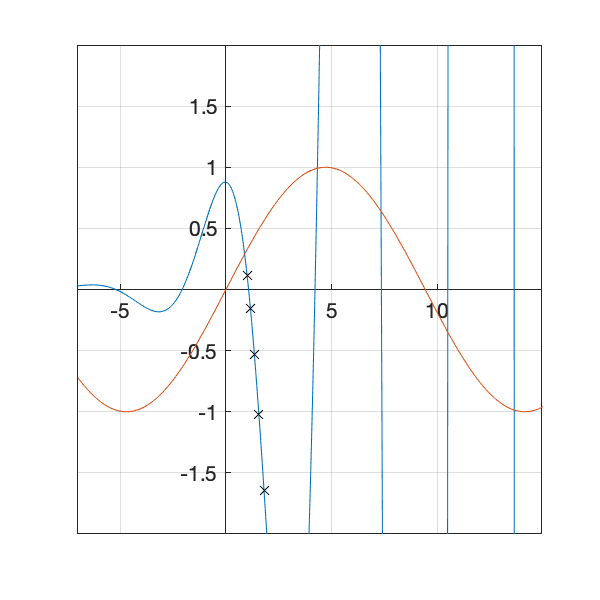

In [12]:
% define function to minimize
f = @(x) cos(x+0.5).*exp(0.5*x);
% its gradient
g = @(x) sin(x./3);

% starting point
x0 = 1;
% plot both f and g
fplot(f); hold on
fplot(g)
% do the gradient descent and get history as well
[minimum,xes] = gradientDescent(x0,f,.1,800);
fprintf('found minimum @x=%f\n',minimum);
% plot history and found minimum into plot
plot(xes,f(xes),'kx')
plot(minimum,f(minimum),'ro')

grid on;
xlim([-7 15])
ylim([-2 2])
ax = gca;
ax.XAxisLocation = 'origin';
ax.YAxisLocation = 'origin';

Now we had a small step-size, but we slid into the other side of the function as well - the gradient pointed that way!!

<div class="alert alert-warning">
<p>Even with such a suitably small step-size, gradient descent only is guaranteed to find <b>...</b>!!
</div>
<p><p>


### Upgrading gradient descent

You can of course do **much better** than the simple implementation given above. 

For example:

1. You can stop if either the gradient is small enough, or if the changes between two consecutive $x$ is small enough

2. You could adapt the step-size to the gradient of the function - if it's small, you can step further than when it is large!

3. You can implement ... in order to perhaps have a chance to find your true, global minimum.

This is not doing better, but you can of course also use the numeric gradient descent if your function is a tad too complicated.


ax = 

  Axes with properties:

             XLim: [-5 5]
             YLim: [-37.2753 17.0889]
           XScale: 'linear'
           YScale: 'linear'
    GridLineStyle: '-'
         Position: [0.1300 0.1100 0.7750 0.8150]
            Units: 'normalized'

  Use GET to show all properties

1: found minimum @x=-5.329067
2: found minimum @x=-5.329067
3: found minimum @x=-5.329067
4: found minimum @x=-0.738638
5: found minimum @x=-0.738638
6: found minimum @x=-0.738638
7: found minimum @x=-0.738638
8: found minimum @x=-0.738638
9: found minimum @x=-0.738638
10: found minimum @x=-0.738638
11: found minimum @x=-0.738638
12: found minimum @x=1.970490
13: found minimum @x=1.970490
14: found minimum @x=1.970490
15: found minimum @x=1.970490
16: found minimum @x=1.970490
17: found minimum @x=1.970490
18: found minimum @x=1.970490
19: found minimum @x=1.970490
20: found minimum @x=1.970490
Elapsed time is 0.246414 seconds.
1: found minimum @x=-5.329017
2: found minimum @x=-5.329017
3: found min

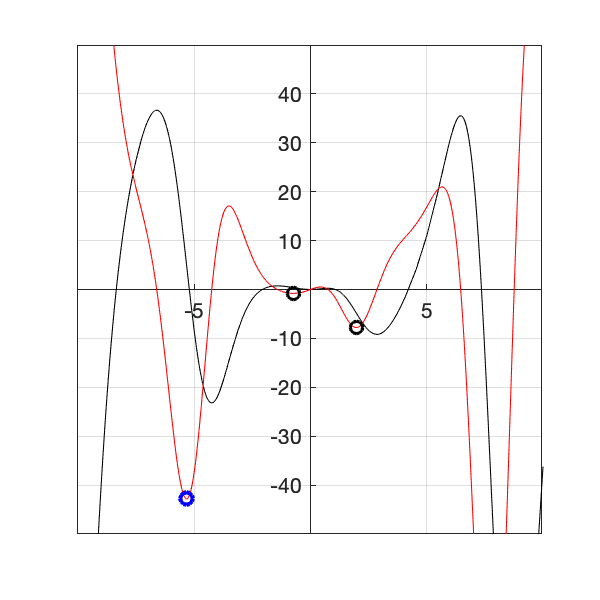

In [13]:
% define rather complicated f
f = @(x) cos(x+0.5).*exp(0.5*sin(x)+log(x.^2));
% I had some help here from Mathworks ^^
realg = @(x) cos(x + 1/2).*exp(log(x.^2) + sin(x)/2).*(cos(x)/2 + 2./x) - sin(x + 1/2).*exp(log(x.^2) + sin(x)/2);
% or I can just be lazy!
g = @(x) (f(x + 0.0001)-f(x))/0.0001 ;

% plot both f and g/realg
fplot(f, 'k'); hold on
fplot(g, 'b'); fplot(realg,'r') % you should not see a difference!
grid on
ax = gca
hold on

% starting points!
x0 = [-4.9:.5:5];

% time it and do gradient descent with the numerical gradient
tic
minimum=[];
for i=1:length(x0)
    minimum(i) = gradientDescent(x0(i),g,.01,800);
    fprintf('%d: found minimum @x=%f\n',i,minimum(i));
end
toc

% time it and do gradient descent with the real gradient
tic
minimum=[];
for i=1:length(x0)
    minimum(i) = gradientDescent(x0(i),realg,.01,800);
    fprintf('%d: found minimum @x=%f\n',i,minimum(i));
end
toc

% plot all minima
plot(minimum,realg(minimum),'ko', 'LineWidth', 1.5)

% find the lowest of all minima!
[min_val,min_ind]= min(realg(minimum))
plot(minimum(min_ind), min_val, 'bo','LineWidth',2)
xlim([-10 10])
ylim([-50 50])
grid on;
ax = gca;
ax.XAxisLocation = 'origin';
ax.YAxisLocation = 'origin';

<h3 style="color:red;"># [Question] Why would the gradient descent from the numerical derivative function take longer than matlab symbolic derivative function ?
# Is it because there is /h part from f(x+h) - f(x) / h part ? for every gradient descent's derivative value calculation ?</h3>

Note that the two gradients seem pretty close.

Gradient descent seems to be a tad shorter for the real gradient - possibly due to the fact that function calling has an overhead and we do that twice in g. 

In addition, there are slight numerical discrepancies between the two methods - these could be due to rounding errors in either g or realg.

### Line-fitting using gradient descent

Let's do our vanilla demo example of fitting a line to data. 

Our error function for fitting a line to data is:

$$
f(w,b)=\sum_i \left ( (wx_i+b) - y_i\right )^2
$$

How can we write this more compactly? We remember linear algebra and the Vandermonde matrix!

If we make a new matrix $X$ with
$$
X:=\left ( \begin{matrix}1&x_1\\1&x_2\\\vdots&\vdots\\1&x_n\end{matrix} \right )
$$

and combine our parameters $w,b$ into one vector $\vec{p}=(w,b)^{\top}$, then our problem from above becomes:

$$
f(\vec{p})= (Xp - y).^2
$$

To make it easier, we add a factor of 0.5 to $E$ and write it out as an inner product:

$$f(\vec{p})$$

which we can easily derive with respect to $\vec{p}$ to get its derivative!

So let's fit a line to our linear data using gradient descent:


In [14]:
repmat(0,7,1)


ans =

     0
     0
     0
     0
     0
     0
     0



In [15]:
% get our line data
data = [[1 3.7];[2 5.4];[3 5.6];[3.2 7.0]; [4 7.6];[5 7.9];[6 9.5]];
% get x and y coordinates separately
x = data(:,1); y = data(:,2);
% create Vandermonde matrix for polynomial of first degree
X = [x repmat(1,length(data),1)]; %엑스 좌표, 1 이 여러 로우로 널부러진거 (6개 로우)
% this is the error function for fitting the polynomial then
f  = @(p) 0.5*(X*p-y)'*(X*p-y); % derive with respect to p / x좌표에서 다항근사한 것의 에러 함수
% and this is its gradient - note that this has n+1 entries!
gw = @(p) X'*X*p-X'*y; % 에러함 수의 그레디언트 
% paramete 2 => so gradient 2 for those.
% you want to be lazy? I have you covered!
%gw = @(p) cat(2,(f([p(1)+0.0001,p(2)])-f(p))/.0001,(f([p(1),p(2)+0.0001])-f(p))/.0001);;

% starting point for w and b
p0=[-.5;.5];
% define small step-size
stepSize=.00005;
% iteration number
iter=1;
% init minimum candidate
minimum = p0;
% plot the data and the error function
figure(101)
scatter(x,y); xlabel('x');ylabel('y');hold on;
figure(102);
% create suitable combinations of w and b to plot
[ws,bs]=meshgrid([-1:.1:2],[.4:.1:3]);
% make a plot of the error function by looping through w,b
fs=[];
for r=1:size(ws,1)
    for c=1:size(ws,2)
        fs(r,c)=f([ws(r,c);bs(r,c)]);
    end
end
surf(ws,bs,fs); view(45,20); xlabel('w');ylabel('b');zlabel('f(w,b)');hold on


% do the gradient descent
while iter<=20000
    % update plots from time-to-time
    if (mod(iter-1,100)==0)
        figure(101)
        plot(x,minimum(1)*x+minimum(2),'b-','LineWidth',.5)
        figure(102)
        plot3(minimum(1),minimum(2),f(minimum),'ro')
    end
    % do one update step
    minimum = minimum - stepSize.*gw(minimum)   ; % =>gradient 
    iter=iter+1;
end
fprintf('minimum = %f,%f',minimum(1),minimum(2))

figure(101)
plot(x,minimum(1)*x+minimum(2),'r-','linewidth',2)
grid on

% w has more influence more steep in the surf


minimum = 1.235843,2.299642

With these two plots, we can learn a lot of things about gradient descent. Perhaps the most interesting plot is the lower one, which plots the error surface and the values of the error function as gradient descent walks down.

We can see a first large step in the direction of $w$ - this clearly has the most influence of the two parameters in terms of determining the direction. This is done a few more times, and then the line basically has almost the correct slope $w$. Next, the system walks down the more shallow slope of the parameter $b$, which is then optimized in many more smaller steps.

Hence we learn that optimizing the intercept $b$ here is much "harder" or "slower" than optimizing its slope using gradient descent! 


This issue is also connected to the issue of scaling of the features - if one of the input dimensions has a vastly different scaling, gradient descent will be sensitive to this. 

<h2 style="color:red;">Question : Scaling Gap, How to solve > </h2>

### Stochastic Gradient Descent

Let's say you want to fit a line, but you have a million points.

Looking at our code, this means that we need to manipulate and multiply a Vandermonde matrix with a million rows several times.

This is technically do-able, but even modern computers with lots of memory will run out of memory like this.

How do we overcome this issue? We have a crucial idea:

<div class="alert alert-warning">
<p>If we assume that our million data points all carry some sort of information about our problem, we can exploit the redundancy in that dataset by simply evaluating the gradient on a ....
</div>

This method (and its many variations) is called stochastic gradient descent.

<h3 style="color:red;">Question : stochastic gradient fomula why calculated so ? > </h3>

the MATLAB function has been cancelled


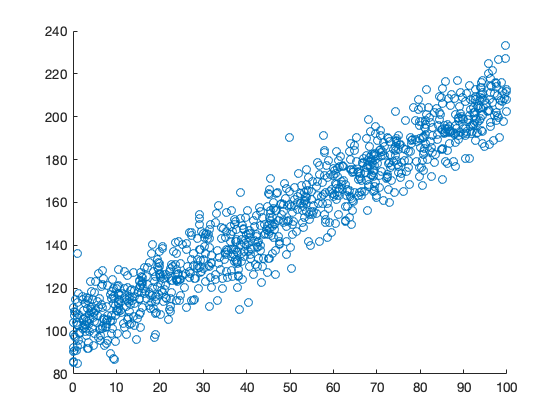

In [1]:
totPoints = 100000;
% form a line with random noise added
x = linspace(0,100,totPoints)'; y = x*1.1+100.0+10*randn(totPoints,1);
% since there may be many points, plot only at most 1000
scatterInd = randperm(totPoints); %shuffle
scatterInd = scatterInd(1:min(totPoints,1000)); %choose random 1000 from 1 ~ 100000
figure(201);scatter(x(scatterInd),y(scatterInd)); hold on % scatter above-chosen random 1000 from x,y  in figure201

% create Vandermonde matrix [note, this is not actually necessary!]
X = [x repmat(1,totPoints,1)]; 
% error function - very expensive to compute with lots of samples!
f  = @(p) 0.5*(X*p-y)'*(X*p-y);
% stochastic gradient evaluated at certain indices i
gwi = @(p,i) X(i,:)'*X(i,:)*p-X(i,:)'*y(i);  % simply select one of those point
% store function values for later plotting
fs=[];
% do this whole process 10 times
for sample=1:10
    % starting point
    minimum=[-.5;20];
    % iteration number
    iter=1;
    % step size for gradient descent
    stepSize0=.0001;
    % give it time to at least see all the points once or twice
    while iter<=2*totPoints % every data need to have a chance to vote!!
        % update plots
        if (mod(iter-1,1000)==0)
            fs(sample,ceil(iter/1000))=log(f(minimum));
        end
        % this selects ONE random index from all points! => random : now at issue chosen
        i=1+floor(rand*totPoints); 
        
        % select ten random indices ( this is called mini-batch )
        ind = randperm(totPoints); 
        i = ind(1:10);
        % this would ensure that we walk slower and slower
        % the parameter totPoints is the number of update steps
        % that are used to stabilize the solution
        % stepSize=stepSize0/(1+iter/totPoints);
        % standard step-size
        stepSize=stepSize0;
        % update step
        minimum = minimum-stepSize*gwi(minimum,i); % exactly select that point and update % this will be done tentimes
        iter=iter+1;
    end
    fprintf('sample %d: minimum = %f,%f\n',sample,minimum(1),minimum(2))
    figure(201)
    plot(x,minimum(1)*x+minimum(2),'r-','LineWidth',2)
end
% plots the current error function value - expensive!
figure(202);plot(fs'); grid on; 
xlabel('Iteration (1000s)'); ylabel('Log(Error)');

% ten lines => they are not the same
% different amount of points voted -> so different 
% but it's bit similar

% below is the loga of the error
% 경향성으로 보면 => 내려감 => 그러나 아웃라이어가 선택되어 보트 하여 조정이 이루어지기 때문에 => 

% 그레디언트 업데이트가 원포인트 중심이기 때문에 => 코스트가 적지

% 그러나 아웃라이어가 클라우드를 형성하고 끌고 가면 => 회복 가능하지 않은 상황이 생길수도 있지 ..
% 보완책
% 스텝사이즈 작게 해야된다고 ?? ?
% 

We can see that the 10 repetitions (samples) yield similar, but slightly different solutions - similarly, the evolution of the error of our solution is different for the 10 repetitions. We can also clearly see the noise inherent in the stochastic gradient descent and the fact that this noise **grows** towards the end of the iterations!

Note that this method of course only works if all points have some sort of relation to the model. In our case, we have no outliers, but simply some random Gaussian noise on our linear data, so that our model is reasonably well-behaved.

In addition, the line fit only has two parameters, but have several thousand points, which makes the minimum "more unique". We will see changes in the shape of the error curves when we go to optimization with a much larger number of parameters in the next lectures on neural networks.

### Upgrading stochastic gradient descent

This is an art-form in and of itself. You can add the same changes to this as before (updating of the learning rate, etc.). This is already indicated in the code above - however, this introduces several other parameters, and how to do this properly is not at all intuitive. Any learning rate decay, however, will try to prevent overly large fluctuations of the gradient towards the end of the iterations.

Another change that is worthwhile pursuing is to group the gradient calculation into small **mini-batches**, in which say $n=10$ data points are used to upgrade the gradient. We will talk about this briefly in the next lecture as well.